# Our Capstone Project - ST1 Assignment 9
* Diamond price prediction
* Uses a Kaggle dataset

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
%cd /content/drive/MyDrive/Group C02 Capstone Project

/content/drive/MyDrive/Group C02 Capstone Project


In [45]:
!ls /content/drive/MyDrive/Group\ C02\ Capstone\ Project

diamonds.csv


This project uses data from a Kaggle diamond price projection dataset

https://www.kaggle.com/code/karnikakapoor/diamond-price-prediction
* The dataset contains a total of 53,940 samples
* In this report, we plan to use a variety of target variables to design a price prediction module to predict the prices of diamonds based on a series of variables
* To complete this task, we will complete a fifteen step task list that will allow us to carefully evaluate each segment of the module

## Step One: Reading the dataset
Data collection is an essential part of development as it allows us to find recurring patterns, which will help us identify what affects the price of a diamond.

In [46]:
# Supresses warning messages
import warnings
warnings.filterwarnings('ignore')

In [47]:
# Reads the diamond dataset
import pandas as pd
import numpy as nd
DiamondsData=pd.read_csv('/content/drive/MyDrive/Group C02 Capstone Project/diamonds.csv', encoding='latin')
print('Shape of data:', DiamondsData.shape)

# Prints sample data for report
DiamondsData.head(15)

Shape of data: (53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


* The dataset contains a total of 53,940 diamonds
* The diamonds were evaluated with six different variable
  * Carat: Physical weight of the diamonds
  * Cut: Shape of the diamond
  * Colour: Colour of the diamond
  * Clarity: Purity of the diamond
  * Depth: Measurement from top to bottom
  * Table: Flat surface at top of diamond

## Step Two: Problem Statement Definition
The purpose of this report is to create a prediction model that uses variables from the diamonds dataset to predict the price of the diamonds.

## Step Three: Target Variable Identification
As previously stated, as the model will be attempting to prdict the price of the diamonds, price is the target variable.

## Step Four: Visualision the Distribution of Target Variable
It is important to visualise the distribution of the target variable to help identify trends and the shape of the data. It is also a way to ensure that the data is evenly distributed and will provied the model with correct results.

<Axes: >

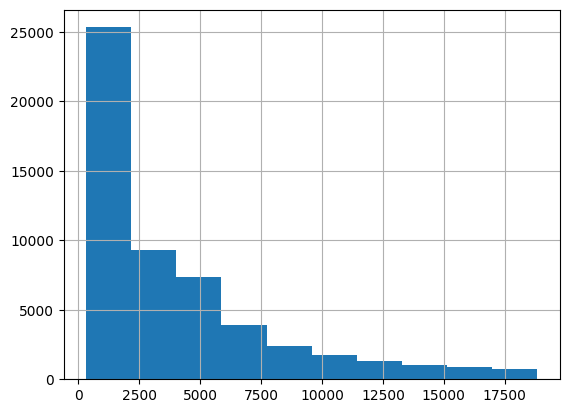

In [48]:
%matplotlib inline
# Will create a histogram to visualise the target variable, price
# helps to understand distrubution of value
DiamondsData['price'].hist()

### Observations for Step Four
* While the data isn't evenly distributed, it does show a clear correlation between how expensive the diamonds are and the other variables

## Step Five: Data Exploration at a Basic Level
* This step is important to gauge the overall fundamentals of the dataset, for example:
  * The volume
  * The important variables and attributes
  * And weed out the unimportant variables
* If data is found to be irrelevent, it will be disregarded during the creation of the prediction model
* A number of functions will be used in the basic exploration of the data
  * head() returns a specific number of rows from the top to acquire a sample
  * info() prints useful info about the dataset
  * describe() prints an overview of the data to get a quick understanding of a sample
  * nunique() returns the number of each unique value for useful information
  * tail() returns a specific number of samples from the last row


In [49]:
# A look at some samples from the top rows in the data
DiamondsData.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [50]:
# A look at some samples from the bottom rows in the data
DiamondsData.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [51]:
# Summarised info from the entire dataset
# Shows the number of data entries, columns, non-null count, and Dtype
DiamondsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [52]:
# returns the detailed statistics of the data
DiamondsData.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [53]:
DiamondsData.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

### Observations from Basic Level Data Exploration
* The following observations will begin to determine which variables will be selected for the prediction model
* From the data, it is visible that the cut, colour, and clarity variables are all objects
* Because these variables are not an integer or string, it is impossible to retrieve important data, such as the standard deviation or mean

## Step Six: Identifying and Rejecting Useless Columns
* Based on observations from the previous step, cut, colour, and clarity do not contribute meaningfully to the price variable
* Due to the variables not being able to contribute to the model, they will be cut from further experimentation and use in the prediction model

## Step Seven: Visual Exploratory Data Analysis of data
* This step involves visualising the remaining variables in the dataset using histograms and bar charts
* The purpose of the testing is to ensure that there are enough rows in each category to be used in the model and are due for further analysis
* The following values will be tested in this step
  * carat
  * depth
  * and table

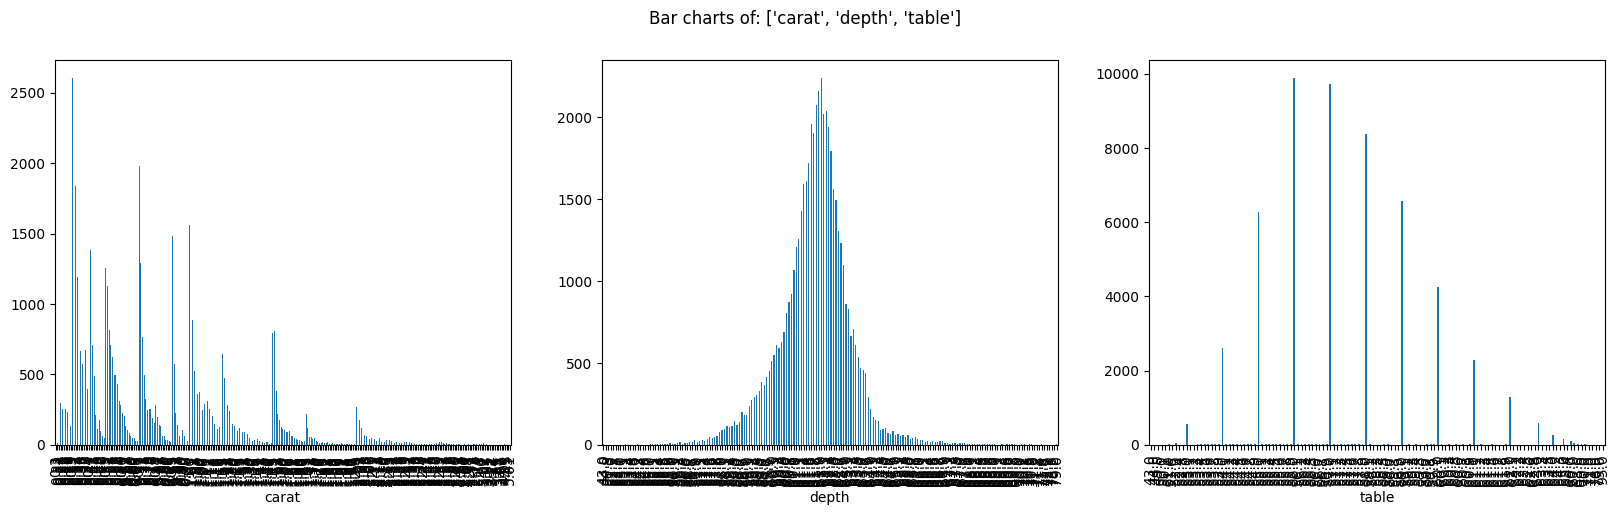

In [54]:
# Code Reference [1]
# Code builds histograms for each given variable
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Creates a subplot for each variable
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Code Reference [1]
# Calls above function to test variables
PlotBarCharts(inpData=DiamondsData, colsToPlot=['carat','depth','table'])

### Observations from Step Seven
* Based on observations from each histogram, using x and y axis from the datagram, all three histograms seem to have a somewhat standard distribution
* The exception is the depth of the diamonds, which appears as gaussian distribution
* While odd, the shape of the depth variable is not cause for immediate disqualification from use in the prediction model.
* Further testing is required to test the usability of these variables

### Step Eight: Feature Selection based on data distribution
* This step requires us to select the best features (Carat, Depth, Table, Cut, Clarity,) which are correlated to the target variable being the price of the diamond.
* This step is done by measuring the correlation values between the features and the target variable.

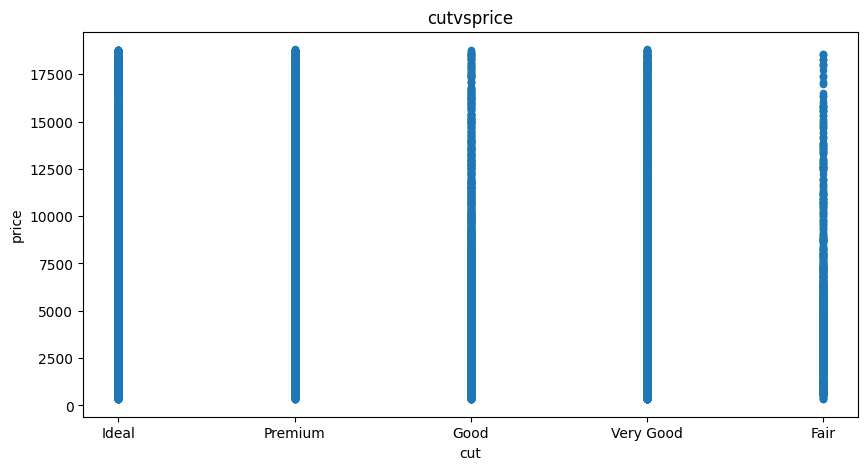

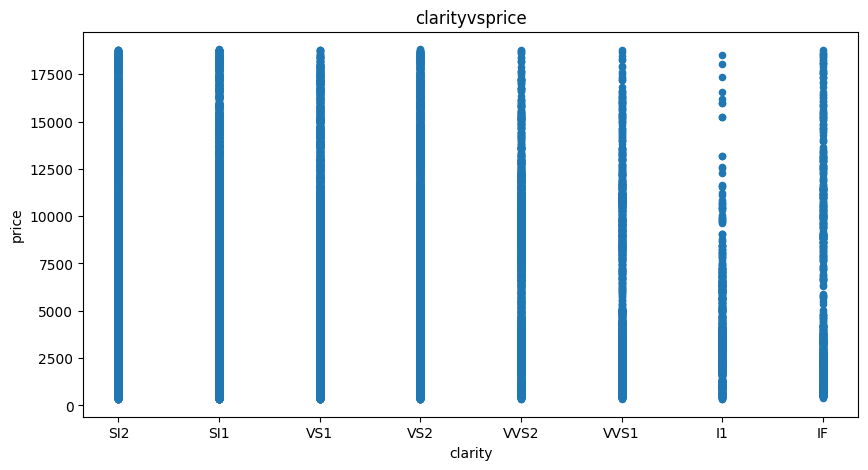

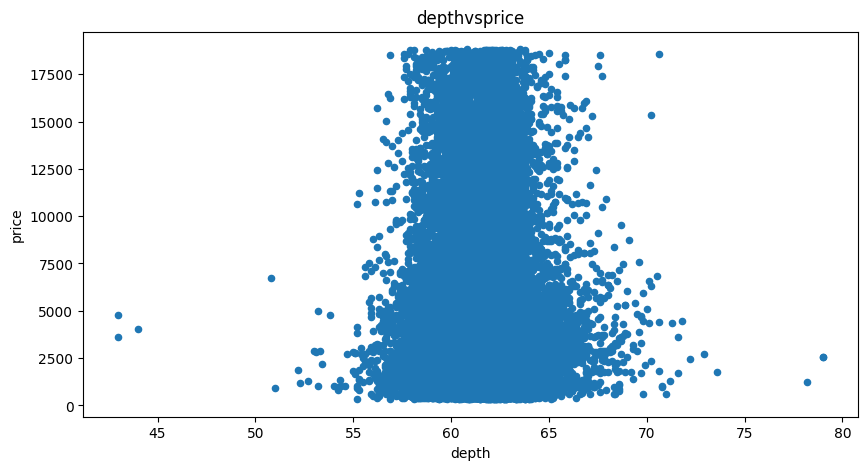

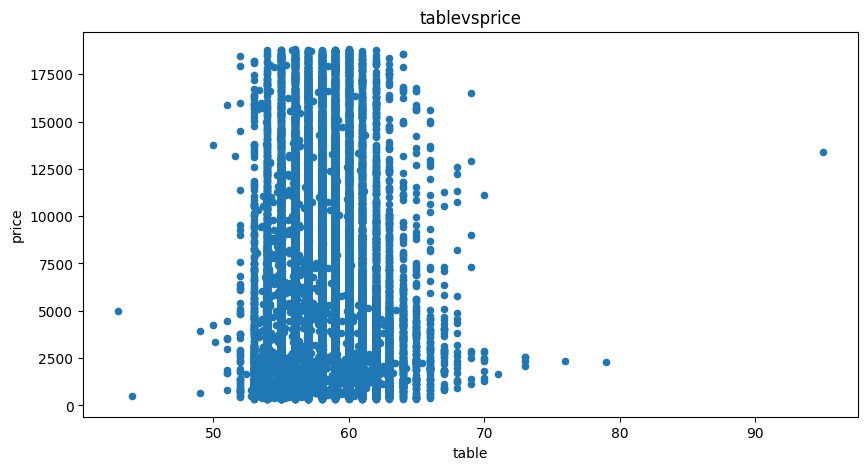

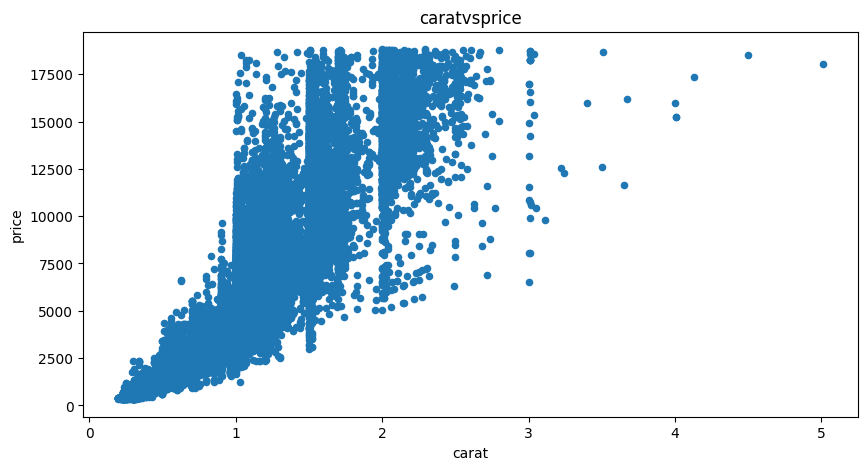

In [55]:
import pandas as pd
import numpy as nd
DiamondsData=pd.read_csv('/content/drive/MyDrive/Group C02 Capstone Project/diamonds.csv', encoding='latin')
# Code Reference [1]
ContinuousCols = ['cut', 'clarity', 'depth', 'table', 'carat']
# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
  DiamondsData.plot.scatter(x=predictor, y='price', figsize=(10,5), title=predictor + "vs" + "price")

#### Observations
Cut vs Price
* No clear trend, therefore no correlation between cut and price

Clarity vs Price
* No clear trend, therefore no correlation between Clarity and Price

Depth vs Price
* Both variables correlate in a positive and negative trend

Table vs Price
* Both variables correlate in a positive and negative trend

Carat vs Price
* Clear Positive trend between Carat and Price

### Step Nine: Removal of outliers and missing values
* Here we remove the outliers in the data to clean it up

In [56]:
import numpy as np

def remove_outliers(DiamondsData, threshold=3):
  z_scores = np.abs((data - np.mean(data))/np.std(data))
  return DiamondsData[(z_scores<threshold)]

  cleaned_data = remove_outliers(DiamondsData)

#### Observations

### Step Ten: Visual and statistic correlation analysis for selection of best features
* Analysing correlation data and selecting the best features
* Using Pearson's correlation coefficient we can determine if the correlation has a downwared, upward or no clear trend

In [57]:
# Code Reference [1]
ContinuousCols = ['price', 'depth', 'table', 'carat']
CorrelationData=DiamondsData[ContinuousCols].corr()

In [58]:
CorrelationData['price'][abs(CorrelationData['price'])>0.5]

price    1.000000
carat    0.921591
Name: price, dtype: float64

#### Observations
* The final selected columns are depth, table, and carat with price being the target variable

### Step Eleven: Data conversion to numeric values for machine learning/predictive analysis

* We convert all the values from the predictor variables to numeric values

In [59]:
# Code Reference [1]
# treating all the nominal variables at once using dummy variables
# Adding target variable to data
#printing sample rows
SelectedColumns=['depth', 'table', 'carat']
DataForML=DiamondsData[SelectedColumns]
DataForML_Numeric=pd.get_dummies(DataForML)
DataForML_Numeric['price']=DiamondsData['price']
DataForML_Numeric.head()

,depth,table,carat,price
0,61.5,55.0,0.23,326
1,59.8,61.0,0.21,326
2,56.9,65.0,0.23,327
3,62.4,58.0,0.29,334
4,63.3,58.0,0.31,335


### Step Twelve: Training/testing sampling and K-fold cross validation
* We split the data into training and testing samples
* we randomly select the data to test how good the machine model is
* the randomly selected data is testing data and the remaining data is training data

In [60]:
from ast import Index
# Code Reference [1]
# Printing all the column names for our reference
SelectedColumns=['depth', 'table', 'carat']
DataForML=DiamondsData[SelectedColumns]
DataForML_Numeric.columns
Index(['depth', 'table', 'carat', 'price'])
# Seperate Target and Predictor Variables
TargetVariable='price'
Predictors=['depth', 'table', 'carat']

x=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=428)

### Step Thirteen: Investigating multiple regression algorithms
* We test code to build machine model

In [61]:
# Code Reference [1]
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

#Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train, y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
#Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, LREG.predict(X_train)))

LinearRegression()
R2 Value: 0.8522320205347207


#### Observations

### Step Fourteen: Selection of the best model
* From the tests we determine which model is the best for deployment

In [62]:
import pandas as pd
import numpy as np
# Code Reference [1]
print('\nModel Validation and Accuracy Calculations')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['carat']=100 * ((abs(
    TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['carat'])
MedianMape=np.median(TestingDataResults['carat'])
Accuracy=100-MAPE
MedianAccuracy=100-MedianMape
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

#Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
  MAPE=np.mean(100*(np.abs(orig-pred)/orig))
  #print('#'*70, 'Accuracy:', 100-MAPE)
  return(100-MAPE)

# Custom Scoring MAPE Calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-fold Cross Validation on a given algorithm
Accuracy_Values=cross_val_score(RegModel, x, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation: \n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Model Validation and Accuracy Calculations
   depth  table  carat  price  Predictedprice
0   62.8   58.0   0.31    802          -111.0
1   63.0   57.0   1.05   6096          5778.0
2   60.3   60.0   1.11   5000          6333.0
3   61.6   56.1   0.70   2306          3330.0
4   59.6   59.0   0.30    776           179.0
Mean Accuracy on test data: 61.73881215090769
Median Accuracy on test data: 72.9437231611173

Accuracy values for 10-fold Cross Validation: 
 [62.60220437 64.8156402  72.06410357 74.24545032 72.37496416 40.34175766
 38.01677775 51.8898077  63.39674677 58.05434983]

Final Average Accuracy of the model: 59.78


#### Observations

### Step Fifteen: Deployment of the best model in production

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.8625237445379117

 Model Validation and Accuracy Calculations
   depth  table  carat  price  Predictedprice
0   62.8   58.0   0.31    802           787.0
1   63.0   57.0   1.05   6096          6478.0
2   60.3   60.0   1.11   5000          7127.0
3   61.6   56.1   0.70   2306          2715.0
4   59.6   59.0   0.30    776           787.0
Mean Accuracy on test data: 75.1201475317607
Median Accuracy on test data: 80.83720281139783

Accuracy values for 10-fold Cross Validation:
 [63.65075127 55.12890605 67.48708433 74.07591267 79.22164961 76.13174084
 78.31082055 55.98073908 76.78615958 68.54377808]

Final Average Accuracy of the model: 69.53


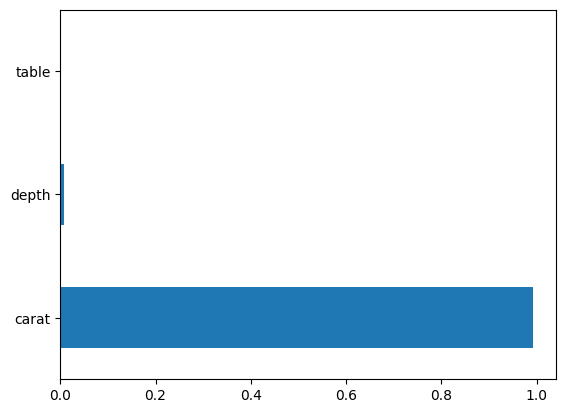

In [63]:
# Code Reference [1]

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

print(RegModel)

AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

print('R2 Value:', metrics.r2_score(y_train, AB.predict(X_train)))

%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n Model Validation and Accuracy Calculations')
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['APE']=100*((abs(
    TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy=100-MAPE
MedianAccuracy=100-MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
  MAPE = np.mean(100*(np.abs(orig-pred)/orig))
  #print('#'*70, 'Accuracy:', 100-MAPE)
  return(100-MAPE)

from sklearn.metrics import make_scorer
custom_scoring=make_scorer(Accuracy_Score, greater_is_better=True)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, x, y, cv=10, scoring=custom_scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## References
[1] "CapstoneProject", *BostonHousePriceProject*, University of Canberra, 2024